<a href="https://colab.research.google.com/github/imjohnson1/imjohnson1.github.io/blob/main/UpdatedCNN_MLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation of TensorFlow (JIC)

In [ ]:
!pip install tensorflow matplotlib

Mount Google Drive

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access dataset
dataset_path = '/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images'

# Verify the path
import os
print(os.listdir(dataset_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['test', 'valid', 'train']


Structure Verification

In [3]:
import os

# Path to your dataset in Google Drive
dataset_path = "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/extractedImages"

# Check the contents of the dataset folder
print("Contents of cropped images folder:")
print(os.listdir(dataset_path))

# Check deeper structure (train/valid/test and their categories)
for split in os.listdir(dataset_path):
    split_path = os.path.join(dataset_path, split)
    if os.path.isdir(split_path):
        print(f"\n{split} folder contains:")
        for category in os.listdir(split_path):
            category_path = os.path.join(split_path, category)
            if os.path.isdir(category_path):
                num_images = len(os.listdir(category_path))
                print(f"  {category}: {num_images} images")


Contents of cropped images folder:
['summary.csv', 'train', 'valid', 'test']

train folder contains:
  stop: 171 images
  speed_limit: 411 images
  crosswalk: 5 images
  uncategorized: 722 images

valid folder contains:
  stop: 83 images
  crosswalk: 1 images
  speed_limit: 13 images
  uncategorized: 0 images

test folder contains:
  stop: 98 images
  crosswalk: 1 images
  speed_limit: 8 images
  uncategorized: 0 images


Run training script

Found 1309 files belonging to 4 classes.
Found 97 files belonging to 4 classes.
Class names: ['crosswalk', 'speed_limit', 'stop', 'uncategorized']
Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3670 - loss: 1.9303
Epoch 1: val_accuracy improved from -inf to 0.40206, saving model to best_model.h5


41/41 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.3678 - loss: 1.9251 - val_accuracy: 0.4021 - val_loss: 1.1257 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4319 - loss: 1.5985
Epoch 2: val_accuracy did not improve from 0.40206
41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4323 - loss: 1.5954 - val_accuracy: 0.1340 - val_loss: 1.4935 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4876 - loss: 1.2955
Epoch 3: val_accuracy did not improve from 0.40206

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4880 - loss: 1.2947 - val_accuracy: 0.1134 - val_loss: 2.1756 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5587 - loss: 1.0802
Epoch 4: val_accuracy did not improve from 0.40206
41/41 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5587 - loss: 1.0803 - val_accuracy: 0.1340 - val_l

Found 415 files belonging to 4 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 726ms/step - accuracy: 0.2478 - loss: 1.1933

⚡ Robustness Test on Modified Images: Accuracy = 0.255, Loss = 1.188


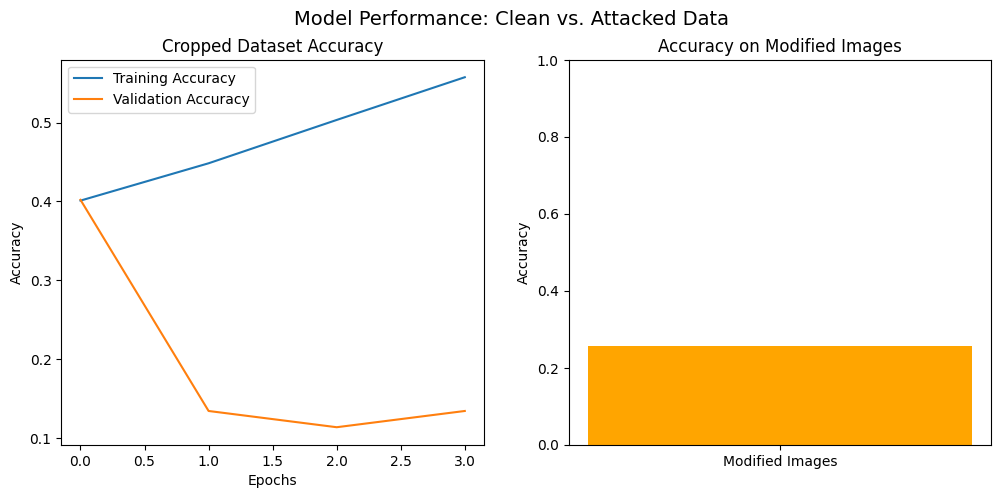

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


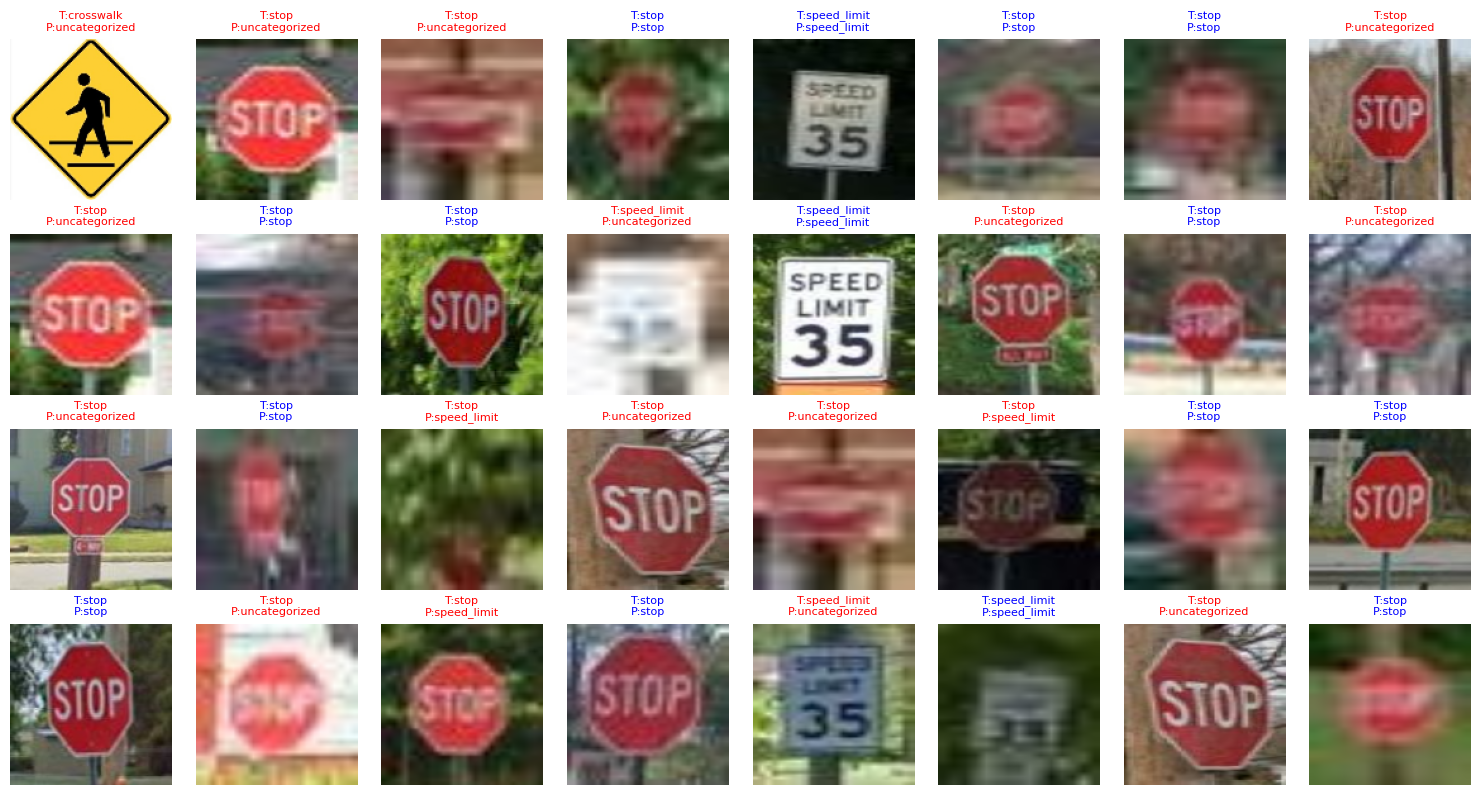

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


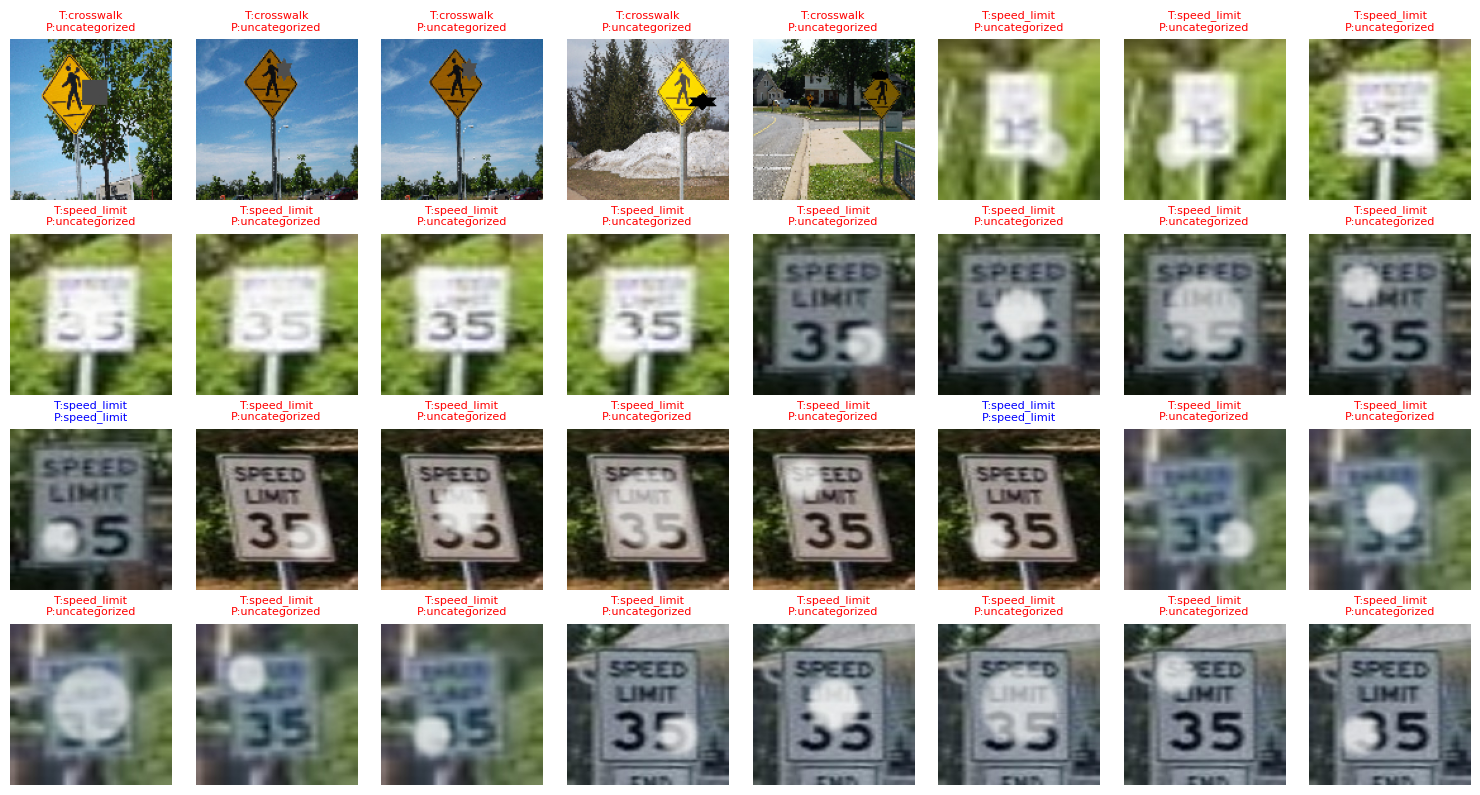


Processing: /content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/train/uncategorized
No uncategorized images found.

Processing: /content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/valid/uncategorized
No uncategorized images found.

Processing: /content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/test/uncategorized
No uncategorized images found.


In [4]:
# --- Imports ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from datetime import datetime
import os, shutil
import numpy as np
from tensorflow.keras.preprocessing import image

# --- Load Dataset ---
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/extractedImages/train",
    image_size=(128, 128),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/extractedImages/valid",
    image_size=(128, 128),
    batch_size=32
)

# --- Class Names ---
class_names = train_ds.class_names
print("Class names:", class_names)

# --- Normalize + Prefetch ---
train_ds = train_ds.map(lambda x, y: (x/255, y))
val_ds = val_ds.map(lambda x, y: (x/255, y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- Data Augmentation ---
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# --- Build CNN with BatchNorm + Dropout ---
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Callbacks ---
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

# --- Train Model ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Save final model
model.save("final_model.h5")

# --- Evaluate on Modified Images ---
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/test",
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)

test_ds = test_ds.map(lambda x, y: (x/255, y)).prefetch(tf.data.AUTOTUNE)

test_loss, test_acc = model.evaluate(test_ds)
print(f"\n⚡ Robustness Test on Modified Images: Accuracy = {test_acc:.3f}, Loss = {test_loss:.3f}")

# --- Output Setup ---
output_dir = "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/outputs"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# --- Side-by-Side Accuracy Plots ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(acc, label='Training Accuracy')
axes[0].plot(val_acc, label='Validation Accuracy')
axes[0].legend()
axes[0].set_title("Cropped Dataset Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")

axes[1].bar(["Modified Images"], [test_acc], color="orange")
axes[1].set_ylim(0, 1)
axes[1].set_title("Accuracy on Modified Images")
axes[1].set_ylabel("Accuracy")

plt.suptitle("Model Performance: Clean vs. Attacked Data", fontsize=14)
plt.savefig(os.path.join(output_dir, f"accuracy_comparison_{timestamp}.png"))
plt.show()
plt.close()

# --- Prediction Grid (Validation / Cropped Dataset) ---
for images, labels in val_ds.take(1):   # one batch
    preds = model.predict(images)
    pred_classes = preds.argmax(axis=1)

    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(4, 8, i+1)
        plt.imshow(images[i].numpy())
        plt.axis('off')
        plt.title(f"T:{class_names[labels[i]]}\nP:{class_names[pred_classes[i]]}",
                  fontsize=8, color='blue' if labels[i]==pred_classes[i] else 'red')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"predicted_grid_clean_{timestamp}.png"))
    plt.show()
    plt.close()

# --- Prediction Grid (Modified Images Dataset) ---
for images, labels in test_ds.take(1):   # one batch
    preds = model.predict(images)
    pred_classes = preds.argmax(axis=1)

    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(4, 8, i+1)
        plt.imshow(images[i].numpy())
        plt.axis('off')
        plt.title(f"T:{class_names[labels[i]]}\nP:{class_names[pred_classes[i]]}",
                  fontsize=8, color='blue' if labels[i]==pred_classes[i] else 'red')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"predicted_grid_modified_{timestamp}.png"))
    plt.show()
    plt.close()

# --- Prediction-Based Auto-Sorting ---
splits = ["train", "valid", "test"]

for split in splits:
    uncategorized_path = f"/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/{split}/uncategorized"
    dest_base = f"/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/{split}"

    print(f"\nProcessing: {uncategorized_path}")

    if not os.path.exists(uncategorized_path):
        print("⚠️ Folder does not exist, skipping...")
        continue

    for cname in class_names:
        os.makedirs(os.path.join(dest_base, cname), exist_ok=True)

    files = [f for f in os.listdir(uncategorized_path)
             if f.lower().endswith((".jpg", ".jpeg", ".png"))]

    if len(files) == 0:
        print("No uncategorized images found.")
        continue

    img_arrays = []
    for file in files:
        img_path = os.path.join(uncategorized_path, file)
        img = image.load_img(img_path, target_size=(128, 128))
        arr = image.img_to_array(img) / 255.0
        img_arrays.append(arr)

    img_arrays = np.array(img_arrays)
    preds = model.predict(img_arrays, batch_size=32)   # predict in batch for speed
    pred_classes = np.argmax(preds, axis=1)

    for file, pred_idx in zip(files, pred_classes):
        pred_class = class_names[pred_idx]
        src = os.path.join(uncategorized_path, file)
        dest = os.path.join(dest_base, pred_class, file)
        shutil.move(src, dest)
        print(f"Moved {file} → {pred_class}")

    # Verification
    print(f"\n✅ Verification for {split}:")
    for cname in class_names:
        category_path = os.path.join(dest_base, cname)
        num_images = len([f for f in os.listdir(category_path)
                          if f.lower().endswith((".jpg", ".jpeg", ".png"))])
        print(f"  {cname}: {num_images} images")


Confusion Matrix (checks for class improvement after training run)

Found 415 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


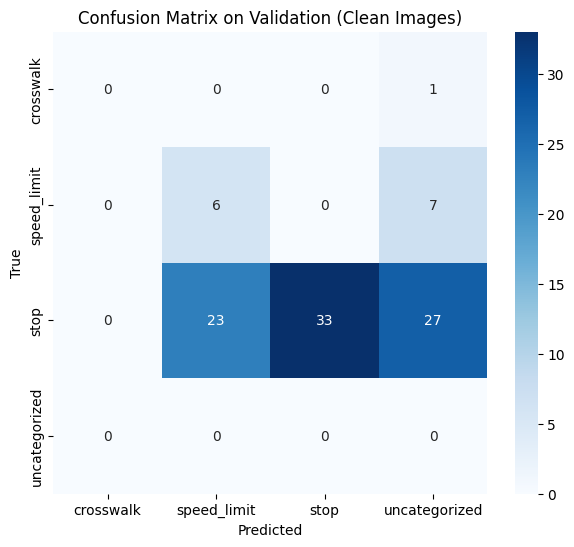

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


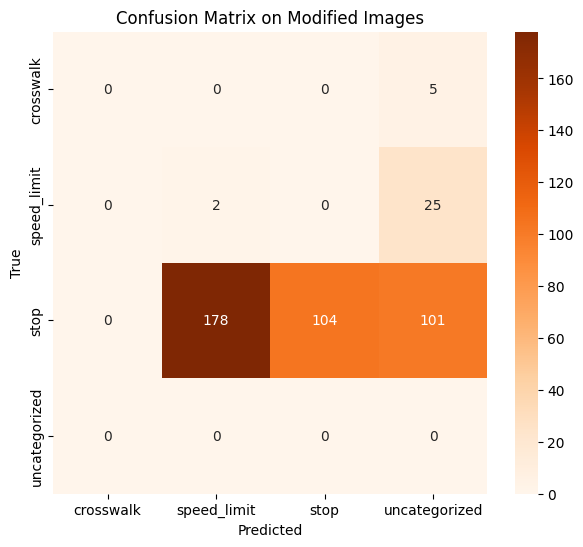

In [6]:
# --- Load Modified Test Dataset ---
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images/test",
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)

# Normalize + Prefetch
test_ds = test_ds.map(lambda x, y: (x/255, y)).prefetch(tf.data.AUTOTUNE)

# --- Confusion Matrices ---
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Timestamp + output directory setup
output_dir = "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/outputs"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# --- Confusion Matrix on Validation (Clean Dataset) ---
y_true_val, y_pred_val = [], []
for images, labels in val_ds:   # validation dataset
    preds = model.predict(images, batch_size=32)
    y_true_val.extend(labels.numpy())
    y_pred_val.extend(np.argmax(preds, axis=1))

cm_val = confusion_matrix(y_true_val, y_pred_val, labels=range(len(class_names)))

plt.figure(figsize=(7,6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Validation (Clean Images)")
plt.savefig(os.path.join(output_dir, f"confusion_matrix_clean_{timestamp}.png"))
plt.show()
plt.close()

# --- Confusion Matrix on Modified Images Dataset ---
y_true_test, y_pred_test = [], []
for images, labels in test_ds:   # modified images dataset
    preds = model.predict(images, batch_size=32)
    y_true_test.extend(labels.numpy())
    y_pred_test.extend(np.argmax(preds, axis=1))

cm_test = confusion_matrix(y_true_test, y_pred_test, labels=range(len(class_names)))

plt.figure(figsize=(7,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Oranges",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Modified Images")
plt.savefig(os.path.join(output_dir, f"confusion_matrix_modified_{timestamp}.png"))
plt.show()
plt.close()


Image Placement Verification

In [7]:
import os

base_path = "/content/drive/MyDrive/Group13CST498/Iyauna_MLM/attacked_images"
for split in ["train", "valid", "test"]:
    split_path = os.path.join(base_path, split)
    print(f"\n{split} folder:")
    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            print(f"  {category}: {num_images} images")



train folder:
  stop: 436 images
  speed_limit: 508 images
  crosswalk: 9 images
  uncategorized: 0 images

valid folder:
  stop: 331 images
  crosswalk: 0 images
  speed_limit: 44 images
  uncategorized: 0 images

test folder:
  stop: 383 images
  speed_limit: 27 images
  crosswalk: 5 images
  uncategorized: 0 images


Save and download model

In [8]:
model = keras.models.load_model("best_model.h5")


In [9]:
from google.colab import files
files.download("best_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>